In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [ ]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=url, extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [ ]:
zip_base = os.path.dirname(zip)
!find $zip_dir_base -type d -print

.
./.config
./.config/logs
./.config/logs/2021.04.07
./.config/configurations
./sample_data


In [ ]:
zip_base_full = os.path.join(os.path.dirname(zip), 'cats_and_dogs_filtered')
zip_train = os.path.join(zip_base_full, 'train')
zip_val = os.path.join(zip_base_full, 'validation')

zip_train_cats = os.path.join(zip_train, 'cats')
zip_train_dogs = os.path.join(zip_train, 'dogs')
zip_val_cats = os.path.join(zip_val, 'cats')
zip_val_dogs = os.path.join(zip_val, 'dogs')

In [ ]:
len_cats_train = len(os.listdir(zip_train_cats))
len_dogs_train = len(os.listdir(zip_train_dogs))
len_cats_val = len(os.listdir(zip_val_cats))
len_dogs_val = len(os.listdir(zip_val_dogs))

total_cats = len_cats_train + len_cats_val
total_dogs = len_dogs_train + len_dogs_train


In [ ]:
print("The number of cats in training data:",len_cats_train)
print("The number of dogs in training data:",len_dogs_train)
print("The number of cats in validation data:",len_cats_val)
print("The number of dogs in validation data:",len_dogs_val)

The number of cats in training data: 1000
The number of dogs in training data: 1000
The number of cats in validation data: 500
The number of dogs in validation data: 500


In [ ]:
batch_size = 100
image_shape = 150

In [ ]:
rescale_train = ImageDataGenerator(rescale=1.0/255)
rescale_val = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_gen = rescale_train.flow_from_directory(batch_size=batch_size,
                                              directory=zip_train,
                                              shuffle=True,
                                              target_size=(image_shape,image_shape),
                                              class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
val_gen = rescale_val.flow_from_directory(batch_size=batch_size,
                                              directory=zip_val,
                                              shuffle=True,
                                              target_size=(image_shape,image_shape),
                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [25]:
sample_training, _ = next(train_gen)

In [26]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

TypeError: ignored

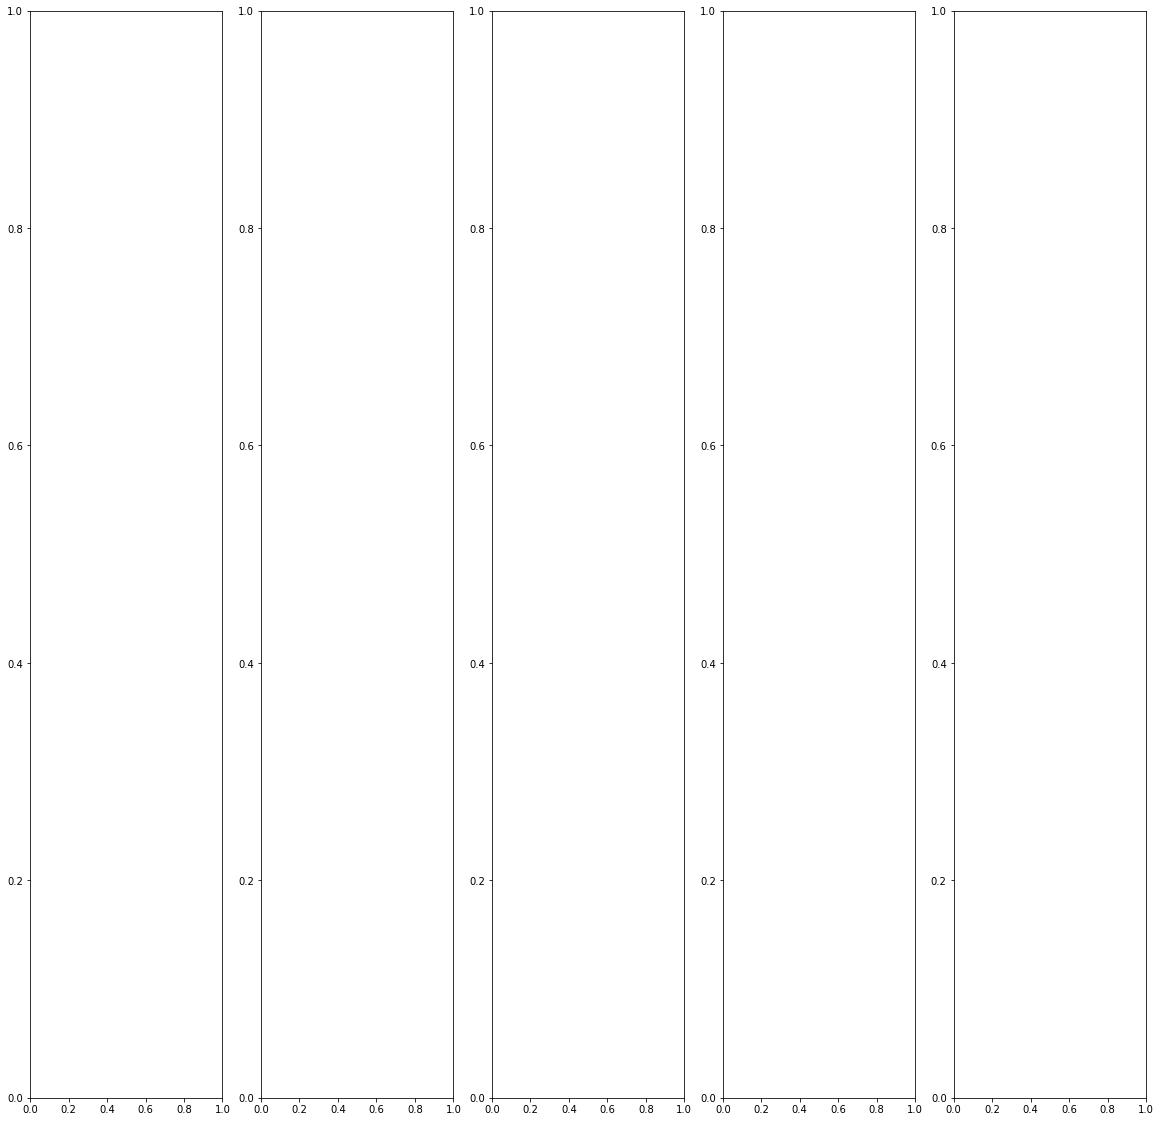

In [29]:
plotImages(sample_training[:5])

In [37]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])